## Final Project

In [13]:
pip install fredapi

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install --upgrade numpy scikit-learn

     |████████████████████████████████| 12.1 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 38.2 MB/s eta 0:00:01
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.0.0
    Uninstalling threadpoolctl-3.0.0:
      Successfully uninstalled threadpoolctl-3.0.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#import the library and tools
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

start_date = datetime(2020,1,31)
end_date = datetime(2024,8,31)

In [3]:
#download the datasets
stock = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


## Stock Analysis and Competitor Summary

In [2]:
#Stock Analysis and Competitor Summary(Assignment1)
stock.info()
print(stock.head())

NameError: name 'stock' is not defined

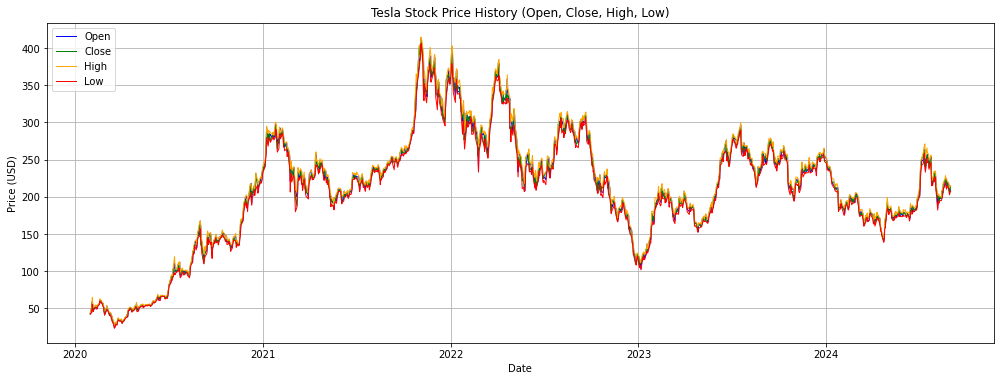

In [17]:
#Plot the stock price history(Open, Close, High, Low)
# Ensure index is datetime for Matplotlib compatibility
stock.index = pd.to_datetime(stock.index)

plt.figure(figsize=(14, 10))

# Plot Open, Close, High, Low
plt.subplot(2, 1, 1)
plt.plot(stock.index, stock['Open'], label='Open', color='blue', linewidth=1)
plt.plot(stock.index, stock['Close'], label='Close', color='green', linewidth=1)
plt.plot(stock.index, stock['High'], label='High', color='orange', linewidth=1)
plt.plot(stock.index, stock['Low'], label='Low', color='red', linewidth=1)
plt.title('Tesla Stock Price History (Open, Close, High, Low)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Find 3 competitors and visualize their stock price history in the same time period - BMW, NIO, and BYD

[*********************100%***********************]  3 of 3 completed


Price       Adj Close                       Close                        High  \
Ticker         BMW.DE        BYD   NIO     BMW.DE        BYD   NIO     BMW.DE   
Date                                                                            
2020-01-31  46.924061  28.973953  3.78  64.339996  29.850000  3.78  65.680000   
2020-02-03  46.953236  29.527224  4.06  64.379997  30.420000  4.06  64.750000   
2020-02-04  47.368946  30.391100  4.51  64.949997  31.309999  4.51  65.209999   
2020-02-05  48.295181  31.119091  4.39  66.220001  32.060001  4.39  66.570000   
2020-02-06  48.375397  31.827673  4.08  66.330002  32.790001  4.08  67.279999   

Price                              Low                        Open             \
Ticker            BYD   NIO     BMW.DE        BYD   NIO     BMW.DE        BYD   
Date                                                                            
2020-01-31  31.129999  4.04  64.209999  29.770000  3.67  65.599998  30.820000   
2020-02-03  30.670000  4.11

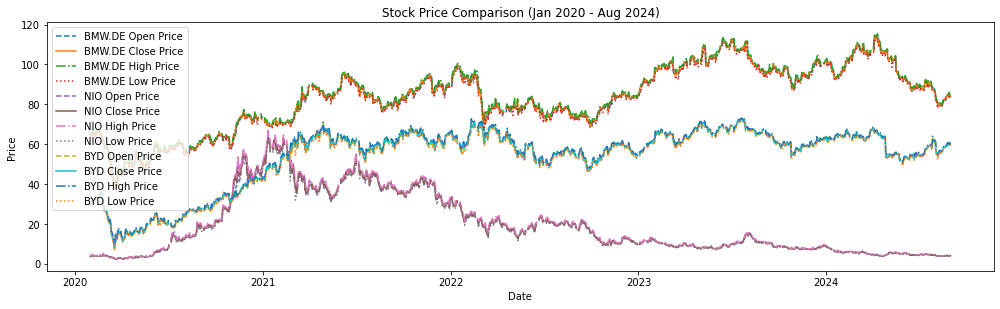

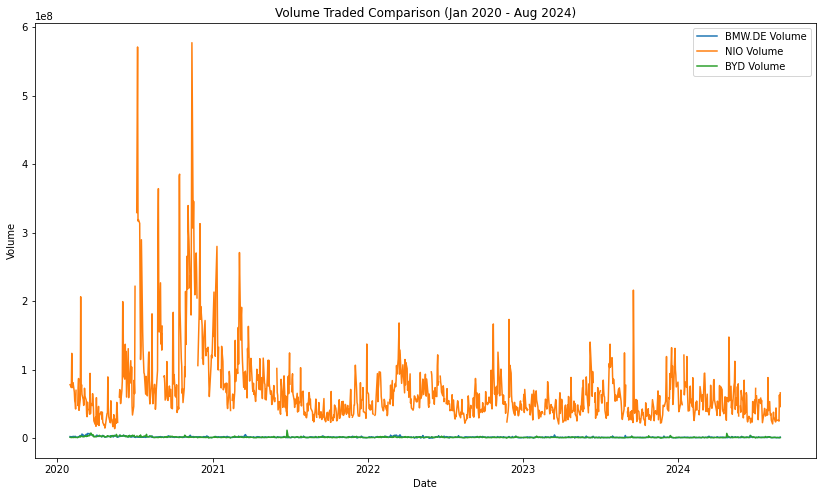

In [18]:
tickers = ['BMW.DE', 'NIO', 'BYD', ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--') 
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')  
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')  
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')  
    
plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend() 
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Loop through each ticker and plot trading volume
for ticker in tickers:
    plt.plot(data['Volume'][ticker], label=f'{ticker} Volume')

# Set the title and axis labels for the volume plot
plt.title('Volume Traded Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend() 
plt.show()

## Extracting the adjusted close of Tesla, calculating mean, variance, skewness and kurtosis, and kernel density estimation¶

mean: 210.14264989684318
variance: Ticker
TSLA    6012.516198
dtype: float64
Skewness: [-0.32115955]
Kurtosis: [0.0443776]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Text(0.5, 0, 'Adjusted Close Price (USD)')

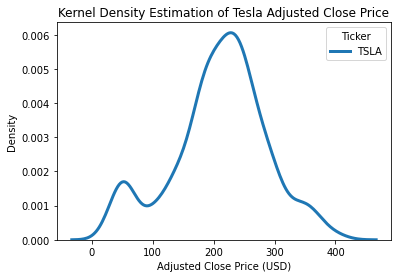

In [19]:
# extract the adjusted close column from the datasets
adjusted_close = stock['Adj Close'].dropna()

# calculate the mean, variance, skewness, and kurtosis of the adjusted close column
mean_adj_close = np.mean(adjusted_close)
variance_adj_close = np.var(adjusted_close)
skewness_adj_close = ss.skew(adjusted_close)
kurtosis_adj_close = ss.kurtosis(adjusted_close)

#Display the values:
print("mean:", mean_adj_close)
print("variance:",variance_adj_close)
print("Skewness:", skewness_adj_close)
print("Kurtosis:", kurtosis_adj_close)
sns.kdeplot(data=adjusted_close,linewidth=3)
plt.title('Kernel Density Estimation of Tesla Adjusted Close Price')
plt.xlabel('Adjusted Close Price (USD)')

## Feature Database Creation

#### 3. Feature Selection from FRED

In [20]:

# fred = Fred(api_key='add your api key and dont forget to remove it before commit')
varList = [
    'T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # Term premium, 30-year jumbo mortgage
    'DEXUSEU', 'DEXJPUS', 'DEXUSUK',       # Spot exchange rates
    'CBBTCUSD', 'CBETHUSD',                # Cryptocurrencies
    'T10YIE', 'DCOILBRENTEU',              # Breakeven inflation, Brent oil price
    'VIXCLS', 'CBSICO',                    # Implied volatilities, consumer sentiment
    'DAAA', 'DBAA',                        # Corporate bond yields
    'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2', 'BAMLH0A0HYM2EY', 
    'DGS1', 'DCOILWTICO', 'DHHNGSP',        # Additional economic indicators
    'ALTSALES',                             # Light Weight Vehicle Sales: Autos and Light Trucks
    
]

# also look at https://tradingeconomics.com/commodity/

# SP500 = fred.get_series('SP500')
# SP500.name = 'SP500'
# df_fred = SP500

# # merge data series
# for i in range(0, len(varList)):
#     series_info = fred.get_series_info(varList[i])

#     # Extract the title
#     title = series_info['title']
#     print(varList[i],'-', title)
    
#     data = fred.get_series(varList[i])
#     data.name = varList[i]
#     df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

####  Please use the features/factors you take and discovered (e.g. FRED, Fama-French website, ADS, momentum factors, technical indicators, volume, price/return lags, etc.) to construct a feature database

In [21]:

import pandas as pd
import numpy as np
from fredapi import Fred
import yfinance as yf

# 1. FAMA-FRENCH 5 FACTORS
# Get the Fama French 5 factor model (monthly data)
data_ff5 = pd.read_csv('FF_Research_Data_5_Factors_daily.csv')
data_ff5['date'] = data_ff5['date'].astype(str).str[0:4]+'-'\
                    +data_ff5['date'].astype(str).str[4:6]+'-'\
                    +data_ff5['date'].astype(str).str[6:8]
                    
data_ff5['date'] = pd.to_datetime(data_ff5['date'])
# data_ff5['date'] = data_ff5['date'].dt.date
df_ffs = data_ff5.set_index('date')

# 2. ADS INDEX
data_ads = pd.read_excel('ADS_Index_Most_Current_Vintage.xlsx')
data_ads['date'] = pd.to_datetime(data_ads['date'])
df_ads = data_ads.set_index('date')


# 3. FRED DATA
fred = Fred(api_key='e2b9d6351c036c7e0a59b80b5713645a')
varList = ['T10Y3M', 'DGS10', 'OBMMIJUMBO30YF',  # term premium 10yr-3mon, 30 yr mortgage jumbo loan
           'DEXUSEU', 'DEXJPUS', 'DEXUSUK', # spot exchange rates to EUR, JPY, GBP 
           'CBBTCUSD', 'CBETHUSD',  # cryptocurrencies
               'T10YIE', 'DCOILBRENTEU', # breakeven inflation + brent oil price 
               'VIXCLS', # implied volatilities
               'DAAA', 'DBAA', # corporate bond yield
              'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2','BAMLH0A0HYM2EY', 'DGS1', 'DCOILWTICO', 
                              'DHHNGSP'] 
SP500 = fred.get_series('SP500')
SP500.name = 'SP500'
df_fred = SP500
# merge data series
for i in range(0, len(varList)):
    data = fred.get_series(varList[i])
    data.name = varList[i]
    df_fred = pd.merge(df_fred, data, left_index=True, right_index=True)

# Resample Fama-French, ADS, and FRED data to daily frequency
df_ffs_daily = df_ffs.resample('D').interpolate(method='linear')
df_ads_daily = df_ads.resample('D').interpolate(method='linear')
df_fred_daily = df_fred.resample('D').interpolate(method='linear')

# 4. STOCK DATA (TESLA)
stock_symbol = 'TSLA'
start_date = '2020-01-01'
end_date = '2024-08-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Add technical indicators

# Calculate Simple Moving Averages (SMA)
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Averages (EMA)
stock_data['EMA_20'] = stock_data['Close'].ewm(span=20, adjust=False).mean()
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

def compute_RSI(data, window=14):
    diff = data.diff(1)
    gain = diff.where(diff > 0, 0).rolling(window=window).mean()
    loss = -diff.where(diff < 0, 0).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))
# Calculate RSI
stock_data['RSI'] = compute_RSI(stock_data['Close'], window=14)

# Calculate Momentum for multiple periods for Tesla stock
momentum_periods = [10, 20, 50]
for period in momentum_periods:
    stock_data[f'Momentum_{period}'] = stock_data['Close'] - stock_data['Close'].shift(period)

def compute_MACD(data, span_long=26, span_short=12, span_signal=9):
    EMA_short = data.ewm(span=span_short, adjust=False).mean()
    EMA_long = data.ewm(span=span_long, adjust=False).mean()
    MACD_line = EMA_short - EMA_long
    signal_line = MACD_line.ewm(span=span_signal, adjust=False).mean()
    return MACD_line, signal_line

stock_data['MACD'], stock_data['Signal_Line'] = compute_MACD(stock_data['Close'])

print(stock_data[['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI', 'MACD', 'Signal_Line']].tail())

# Moving average of volume
stock_data['Volume_MA10'] = stock_data['Volume'].rolling(window=10).mean()

# Add lag features
# Price lags
stock_data['Lag_1'] = stock_data['Close'].shift(1)
stock_data['Lag_5'] = stock_data['Close'].shift(5)

# Return lags (daily returns)
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Return_Lag1'] = stock_data['Return'].shift(1)
stock_data['Return_Lag5'] = stock_data['Return'].shift(5)

# Add Bollinger Bands
def bollinger_bands(data, window=20, num_of_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, lower_band

stock_data['Upper_Band'], stock_data['Lower_Band'] = bollinger_bands(stock_data)

# Add ATR
def atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    ranges = pd.concat([high_low, high_close, low_close], axis=1)
    true_range = np.max(ranges, axis=1)
    return true_range.rolling(window=window).mean()

stock_data['ATR'] = atr(stock_data)

# Add macroeconomic indicators to stock_data
gdp_growth = fred.get_series('GDP', observation_start='2020-01-31')
unemployment = fred.get_series('UNRATE', observation_start='2020-01-31')
stock_data['GDP_Growth'] = gdp_growth.reindex(stock_data.index, method='ffill')
stock_data['Unemployment_Rate'] = unemployment.reindex(stock_data.index, method='ffill')

# Combine all data into a single DataFrame
DATA = pd.concat([stock_data, df_ffs_daily, df_ads_daily, df_fred_daily], axis=1)
print(DATA.columns)
DATA['Target'] = DATA['Close'].shift(-1)
DATA = DATA.dropna()

# Read lithium index
lithium_index_data = pd.read_csv('lithium_index_data.csv')

# Convert 'Date' to datetime if not already in that format
lithium_index_data['Date'] = pd.to_datetime(lithium_index_data['Date'])

# Set the 'Date' as the index
lithium_index_data.set_index('Date', inplace=True)

# Align 'Adj Close' to match the stock_data index and add it as a new column
DATA['Lithium_Adj_Close'] = lithium_index_data['Adj Close'].reindex(DATA.index, method='ffill')


# Add Elon Musk's sentiment analysis score for fun haha
sentiment_analysis_df = pd.read_csv('sentiment_scores.csv')

# Convert 'Date' to datetime if not already in that format
sentiment_analysis_df['Date'] = pd.to_datetime(sentiment_analysis_df['Date'])

# Set the 'Date' as the index
sentiment_analysis_df.set_index('Date', inplace=True)

# Add the compound score to DATA as column
DATA['Elon_Tweet_Sentiment'] = sentiment_analysis_df['compound'].reindex(DATA.index, fill_value=0)

# Save to a single CSV file
DATA.to_csv('Final_Feature_Database.csv', index=True)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### Demonstrate the feature selection process if you use regression-based approach (Ridge regression, LASSO, Elastic Net or LARS) . Virtualize the feature importance if you use decision-tree-based approach (random forest, XGBoost). 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Define features (X) and target (y)
data =  DATA
y = data['Target']
X = data.drop(columns=['Target'])


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Regression-based Feature Selection
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_importance = np.abs(ridge.coef_)

# LASSO Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_importance = np.abs(lasso.coef_)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_importance = np.abs(elastic_net.coef_)

# Compile importance into a DataFrame for comparison
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Ridge': ridge_importance,
    'LASSO': lasso_importance,
    'ElasticNet': elastic_net_importance
}).set_index('Feature')

# Sort by Ridge importance for better visualization
importance_df.sort_values('Ridge', ascending=False, inplace=True)

# 2. Tree-based Feature Selection
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# Add Random Forest importance to the DataFrame
importance_df['RandomForest'] = rf_importance

# Ridge Regression Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, ridge_importance, color='blue')
plt.title('Feature Importance - Ridge Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# LASSO Regression Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, lasso_importance, color='green')
plt.title('Feature Importance - LASSO Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ElasticNet Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, elastic_net_importance, color='purple')
plt.title('Feature Importance - ElasticNet Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Random Forest Feature Importance Visualization
plt.figure(figsize=(12, 12))
plt.barh(X.columns, rf_importance, color='orange')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Visualize feature importance
plt.figure(figsize=(12, 8))
importance_df[['Ridge', 'LASSO', 'ElasticNet', 'RandomForest']].head(10).plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Feature Importances Across Methods')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.tight_layout()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Helper function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{name} Performance:")
    print(f"  Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    print(f"  Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print("-" * 40)
    return test_r2

# Ridge Regression
ridge_r2 = evaluate_model(ridge, X_train, y_train, X_test, y_test, "Ridge Regression")

# LASSO Regression
lasso_r2 = evaluate_model(lasso, X_train, y_train, X_test, y_test, "LASSO Regression")

# ElasticNet Regression
elastic_net_r2 = evaluate_model(elastic_net, X_train, y_train, X_test, y_test, "ElasticNet Regression")

# Random Forest
rf_r2 = evaluate_model(rf, X_train, y_train, X_test, y_test, "Random Forest")

# Compare the R² values
results = {
    "Ridge Regression": ridge_r2,
    "LASSO Regression": lasso_r2,
    "ElasticNet Regression": elastic_net_r2,
    "Random Forest": rf_r2
}

best_model = max(results, key=results.get)
print(f"The most accurate model is: {best_model} with R² = {results[best_model]:.4f}")


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [10]:
# Model 1 - authored by Sahana
# Define features (X) and target (y)
X = data.drop(columns=['Target'])  # All features except the target
y = data['Target']  # Next day's stock price (shifted Close price)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Print confirmation
print("Random Forest model trained successfully.")

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Predict the next day based on the last available data
latest_data = X.iloc[-1:]  # Extract the most recent feature data
next_day_prediction = rf_model.predict(latest_data)[0]

print(f"Predicted Stock Price for the Next Day: ${next_day_prediction:.2f}")

import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='orange', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()


KeyError: 'Target'

In [22]:
# Model 2 - authored by JiachenLu(SVR)
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data (assuming `df` contains the stock data with 'Close' column for closing prices)
df = df.dropna()  # Ensure no missing values
prices = df['Close'].values
dates = np.arange(len(prices)).reshape(-1, 1)  # Use indices as features

# Scale the features
scaler = StandardScaler()
dates_scaled = scaler.fit_transform(dates)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dates_scaled, prices, test_size=0.2, random_state=42, shuffle=False)

# Train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], y_test, label="Actual Prices", color='blue')
plt.plot(dates[-len(y_test):], y_pred, label="Predicted Prices", color='orange', linestyle='--')
plt.title("Support Vector Regression - Stock Price Prediction")
plt.xlabel("Time Index")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [19]:
#Model Training and Performance Comparison


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
# 加载数据
# 替换为您的数据库加载方式
data = pd.read_csv('./Final_Feature_Database.csv')  

# Select features (all except non-numeric and the target variable)
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Target']).columns
X = data[features]
y = data['Target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVR(kernel='rbf')  # Using RBF kernel for flexibility
svm_model.fit(X_train, y_train)

# Predict and evaluate performance on both training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate RMSE for both training and testing sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_rmse, test_rmse


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [21]:
#Benchmark Study(Assignment2 Garch & Kalman)


## Garch Model

In [22]:
# Define the GARCH likelihood function
def garch(param, Y, T):
    # Initialize Params
    mu = param[0]
    omega = param[1]
    alpha = param[2]
    beta = param[3]
    
    # Initialize values
    sigma2 = np.zeros(T)
    sigma2[0] = np.var(Y)
    Likelihood = 0
    
    # Calculate the likelihood
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((Y[t-1] - mu) ** 2) + beta * sigma2[t-1]
        F_t = Y[t] - mu
        v_t = sigma2[t]
        GARCH_Dens_t = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(v_t) + (1 / 2) * (F_t ** 2) / v_t
        Likelihood += GARCH_Dens_t  
    
    return Likelihood


In [23]:
# Define the function to generate the GARCH path
def garch_path(params, Y, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    
    sigma2 = np.zeros(T)
    path = np.zeros(T)
    
    # Initialize volatility and path
    sigma2[0] = np.var(Y)
    path[0] = Y[0]
    
    for t in range(1, T):
        sigma2[t] = omega + alpha * ((path[t-1] - mu) ** 2) + beta * sigma2[t-1]
        path[t] = mu + np.sqrt(sigma2[t]) * np.random.normal(0, 1)
        
    return path, sigma2


In [24]:
# Load stock data (assuming 'stock' DataFrame exists)
Y = np.diff(np.log(stock['Adj Close'].values))
T = Y.shape[0]

# Initial parameter guess
param0 = np.array([np.mean(Y), np.var(Y) / 400, 0.1, 0.03])

# Minimize the negative log likelihood
results = minimize(garch, param0, args=(Y, T), method='BFGS', tol=1e-2, options={'disp': True})
param_star = results.x

# Generate GARCH path using the optimized parameters
path, vol = garch_path(param_star, Y, T)
Y_GARCH = path

# Plotting Actual vs Predicted Log Returns
timevec = np.linspace(1, T, T)
plt.plot(timevec, Y, 'b', label='Actual Returns')
plt.plot(timevec, Y_GARCH, 'r', label='GARCH Predicted Returns')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.title('GARCH Model Prediction vs Actual Log Returns (Tesla)')
plt.legend()
plt.show()

# Calculate RMSE
RMSE = np.sqrt(np.mean((Y_GARCH - Y) ** 2))
print(f'RMSE value is: {RMSE}')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in sc

IndexError: index 0 is out of bounds for axis 0 with size 0

## Kalman Filter

In [25]:
#Kalman filter code to predict Tesla's daily stock prices
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf

stock_symbol = 'TSLA'

# Download stock data
stock = yf.download(stock_symbol, start_date, end_date)
def kalman_filter(param, *args):
    # initialize params
    Z = param[0]
    T = param[1]
    H = param[2]
    Q = param[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    Likelihood = 0
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q
        Likelihood += (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(abs(F[s])) + (1 / 2) * np.transpose(v[s]) * (1 / F[s]) * v[s]

    return Likelihood

def kalman_smoother(params, *args):
    # initialize params
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    # initialize vector values:
    u_predict, u_update, P_predict, P_update, v, F = {}, {}, {}, {}, {}, {}
    Y, S = args
    u_update[0] = Y[0]
    u_predict[0] = u_update[0]
    P_update[0] = np.var(Y) / 4
    P_predict[0] = T * P_update[0] * np.transpose(T) + Q
    for s in range(1, S):
        F[s] = Z * P_predict[s - 1] * np.transpose(Z) + H
        v[s] = Y[s - 1] - Z * u_predict[s - 1]
        u_update[s] = u_predict[s - 1] + P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * v[s]
        u_predict[s] = T * u_update[s]
        P_update[s] = P_predict[s - 1] - P_predict[s - 1] * np.transpose(Z) * (1 / F[s]) * Z * P_predict[s - 1]
        P_predict[s] = T * P_update[s] * np.transpose(T) + Q

    u_smooth, P_smooth = {}, {}
    u_smooth[S - 1] = u_update[S - 1]
    P_smooth[S - 1] = P_update[S - 1]
    for t in range(S - 1, 0, -1):
        u_smooth[t - 1] = u_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (u_smooth[t] - T * u_update[t])
        P_smooth[t - 1] = P_update[t] + P_update[t] * np.transpose(T) / P_predict[t] * (P_smooth[t] - P_predict[t]) / P_predict[t] * T * P_update[t]

    smooth_path = u_smooth
    return smooth_path

Y = stock['Adj Close'].values
S = Y.shape[0]

# Initial parameters
param0 = np.array([0.24, 4.25, np.var(Y) / 2000, np.var(Y) / 50])
results = minimize(kalman_filter, param0, args=(Y, S), method='BFGS', tol=1e-2, options={'disp': True})

# Smoothe and visualize the estimated path
param_star = results.x
path = kalman_smoother(param_star, Y, S)
sorted_path = dict(sorted(path.items()))
Y_kalmanFilter = sorted_path.values()

# Plotting results
timevec = np.linspace(1, S, S)
plt.title('Kalman Filter Stock Price Prediction: ' + stock_symbol)
plt.plot(timevec, Y_kalmanFilter, 'r', label='Kalman Filter Prediction')
plt.plot(timevec, Y, 'b:', label='Actual Stock Price')
plt.legend()
plt.show()

# Extracting the dictionary values into a list (in the same order as keys)
kalman_values = list(Y_kalmanFilter)

# Calculate RMSE
RMSE = np.sqrt(np.mean((np.array(kalman_values) - np.array(Y)) ** 2))
print('RMSE value is: $', RMSE)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TSLA']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:4008: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [26]:
# Trading Rules and Signal Generation

## Trading Rules

### Rule 1: SMA Crossing Strategy
#### Logic: 
buy when a short-term SMA (e.g. SMA_20) crosses a long-term SMA (e.g. SMA_50); sell when a short-term SMA crosses a long-term SMA.
#### Condition:
Buy signal: SMA_20 > SMA_50 and the previous day SMA_20 <= SMA_50
Sell signal: SMA_20 < SMA_50 and previous day SMA_20 >= SMA_50
### Rule 2: Momentum Strategy
#### Logic: 
buy when momentum (Momentum_20) is positive and increasing; sell when it is negative and decreasing.
#### Condition:
Buy signal: Momentum_20 > 0 and Momentum_20 > previous day's Momentum_20
Sell signal: Momentum_20 < 0 and Momentum_20 < Momentum_20 of the previous day.
### Rule 3: Bollinger Band Strategy
#### Logic: 
Sell when price breaks above the upper Bollinger Band; Buy when it falls below the lower band.
#### Conditions:
Buy signal: Close < Lower_Band
Sell signal: Close > Upper_Band
### Rule 4: Sentiment-based strategies
#### Logic: 
utilize the Elon_Tweet_Sentiment indicator. Buy when sentiment is significantly positive; sell when significantly negative.
#### Condition:
Buy signal: Elon_Tweet_Sentiment > some threshold (e.g. 0.2)
Sell signal: Elon_Tweet_Sentiment < some threshold (e.g. -0.2）

Translated with DeepL.com (free version)

In [27]:
# # 1 means buy, -1 means sell, 0 means stay the same

# # Rule 1: Moving Average Crossover
# def moving_average_crossover(df):
#     df['Signal_MA'] = 0
#     df['Signal_MA'] = np.where((df['SMA_20'] > df['SMA_50']) & (df['SMA_20'].shift(1) <= df['SMA_50'].shift(1)), 1, df['Signal_MA'])
#     df['Signal_MA'] = np.where((df['SMA_20'] < df['SMA_50']) & (df['SMA_20'].shift(1) >= df['SMA_50'].shift(1)), -1, df['Signal_MA'])
#     return df

# # Rule 2: Momentum Strategy
# def momentum_strategy(df):
#     df['Signal_Momentum'] = 0
#     df['Signal_Momentum'] = np.where((df['Momentum_20'] > 0) & (df['Momentum_20'] > df['Momentum_20'].shift(1)), 1, df['Signal_Momentum'])
#     df['Signal_Momentum'] = np.where((df['Momentum_20'] < 0) & (df['Momentum_20'] < df['Momentum_20'].shift(1)), -1, df['Signal_Momentum'])
#     return df

# # Rule 3: Bollinger Bands Strategy
# def bollinger_band_strategy(df):
#     df['Signal_Bollinger'] = 0
#     df['Signal_Bollinger'] = np.where(df['Close'] < df['Lower_Band'], 1, df['Signal_Bollinger'])
#     df['Signal_Bollinger'] = np.where(df['Close'] > df['Upper_Band'], -1, df['Signal_Bollinger'])
#     return df

# # Rule 4: Sentiment Strategy
# def sentiment_based_strategy(df, sentiment_threshold=0.2):
#     df['Signal_Sentiment'] = 0
#     df['Signal_Sentiment'] = np.where(df['Elon_Tweet_Sentiment'] > sentiment_threshold, 1, df['Signal_Sentiment'])
#     df['Signal_Sentiment'] = np.where(df['Elon_Tweet_Sentiment'] < -sentiment_threshold, -1, df['Signal_Sentiment'])
#     return df


In [28]:
file_path = './Final_Feature_Database.csv'  # 文件路径
feature_database = pd.read_csv(file_path)

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract relevant features and the target variable from the dataset
features = feature_database.select_dtypes(include=['float64', 'int64']).drop(columns=['Target']).columns
X = feature_database[features]
y = feature_database['Target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVR(kernel='rbf')  # Using RBF kernel for flexibility
svm_model.fit(X_train, y_train)

# Predict the entire dataset to simulate trading
predicted_prices = svm_model.predict(X)

# Add predictions to the dataset
feature_database['Predicted_Target'] = predicted_prices

# Define trading signals
# Buy signal: predicted price > current close price
# Sell signal: predicted price < current close price
feature_database['Signal'] = feature_database.apply(
    lambda row: 'Buy' if row['Predicted_Target'] > row['Close'] else 'Sell',
    axis=1
)

# Add a column to track daily returns
feature_database['Daily_Return'] = feature_database['Close'].pct_change()

# Calculate cumulative profits and losses based on signals
initial_investment = 100000  # Starting capital
feature_database['Profit/Loss'] = feature_database['Signal'].shift().apply(
    lambda signal: initial_investment * feature_database['Daily_Return'] if signal == 'Buy' else 0
).cumsum()

# Display the results for review
#import ace_tools as tools; tools.display_dataframe_to_user(name="Trading Simulation Results", dataframe=feature_database)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [29]:
import plotly.graph_objects as go
import pandas as pd

# # 将日期列设为索引，便于绘图
# feature_database['Unnamed: 0'] = pd.to_datetime(feature_database['Unnamed: 0'])
# feature_database.set_index('Unnamed: 0', inplace=True)

# 绘制股价和交易信号图
fig_price_signals = go.Figure()

# 添加收盘价折线图
fig_price_signals.add_trace(go.Scatter(
    x=feature_database.index,
    y=feature_database['Close'],
    mode='lines',
    name='Close Price'
))

# 添加买入信号
buy_signals = feature_database[feature_database['Signal'] == 'Buy']
fig_price_signals.add_trace(go.Scatter(
    x=buy_signals.index,
    y=buy_signals['Close'],
    mode='markers',
    name='Buy Signal',
    marker=dict(symbol='triangle-up', color='green', size=10)
))

# 添加卖出信号
sell_signals = feature_database[feature_database['Signal'] == 'Sell']
fig_price_signals.add_trace(go.Scatter(
    x=sell_signals.index,
    y=sell_signals['Close'],
    mode='markers',
    name='Sell Signal',
    marker=dict(symbol='triangle-down', color='red', size=10)
))

fig_price_signals.update_layout(
    title="Stock Prices with Trading Signals",
    xaxis_title="Date",
    yaxis_title="Stock Price (USD)",
    template="plotly_white"
)

# 绘制每日回报图
fig_daily_returns = go.Figure()
fig_daily_returns.add_trace(go.Scatter(
    x=feature_database.index,
    y=feature_database['Daily_Return'],
    mode='lines',
    name='Daily Return'
))
fig_daily_returns.update_layout(
    title="Daily Returns",
    xaxis_title="Date",
    yaxis_title="Return",
    template="plotly_white"
)


# 显示交互式图表
fig_price_signals.show()
fig_daily_returns.show()


ModuleNotFoundError: No module named 'plotly'